<a href="https://colab.research.google.com/github/Avilez-dev-11/Projects-In-Ai-ML/blob/main/homework2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task 1:

Implement a Decision Tree Classifier for your classification problem. You may use a built-in package to implement your classifier. Additionally, do the following:

* Visualize the decision tree structure for at least three different parameter settings.
Comment on how the depth and complexity change the tree.
* Do some research on what sensitivity analysis is and how it is performed (include citations). Perform a sensitivity analysis to measure the impact of at least two input features on your model's decision boundary.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/loan-approval-classification-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/loan-approval-classification-data


In [2]:
ls '{path}'

loan_data.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [4]:
path += '/loan_data.csv'

In [5]:
# Assuming you've downloaded the dataset to the specified path
df = pd.read_csv(path, sep=',', header=0)
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [6]:
df['person_home_ownership'] = df['person_home_ownership'].astype('category').cat.codes
df['person_education'] = df['person_education'].map({'High School': 0, 'Associate': 1, 'Bachelor': 2, 'Master': 3, 'Doctorate': 4})
# Map 'Yes' to 1 and 'No' to 0
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'Yes': 1, 'No': 0})

In [7]:
# Drop non-numerical columns
df = df.select_dtypes(include=['number'])

In [8]:
df.describe()

,person_age,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,1.383333,8.031905e+04,5.410333,1.696622,9583.157556,11.006606,0.139725,5.867489,632.608756,0.507956,0.222222
std,6.045108,1.077741,8.042250e+04,6.063532,1.440497,6314.886691,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,0.000000,8.000000e+03,0.000000,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,0.000000,4.720400e+04,1.000000,0.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,1.000000,6.704800e+04,4.000000,3.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,2.000000,9.578925e+04,8.000000,3.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,1.000000,0.000000
max,144.000000,4.000000,7.200766e+06,125.000000,3.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000


In [9]:
df['loan_status'] = df['loan_status'].astype(int)  # Convert 'loan_status' column to integers
X = df.drop('loan_status', axis=1)  # Features (avvident parameters)
y = df['loan_status']  # Target variable (accident)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
y_train.head()

,loan_status
30159,0
6777,1
36563,0
11784,0
10370,1


In [11]:
import graphviz
from sklearn.tree import export_graphviz


def visualive_decision_tree(dtcModel):

    # Visualize the tree using export_graphviz (for a more detailed view)
    dot_data = export_graphviz(dtcModel, out_file=None,
                             feature_names=X.columns,
                             class_names=['Loan Denied', 'Loan Approved'],
                             filled=True, rounded=True,
                             special_characters=True)
    graph = graphviz.Source(dot_data)

    display(graph)

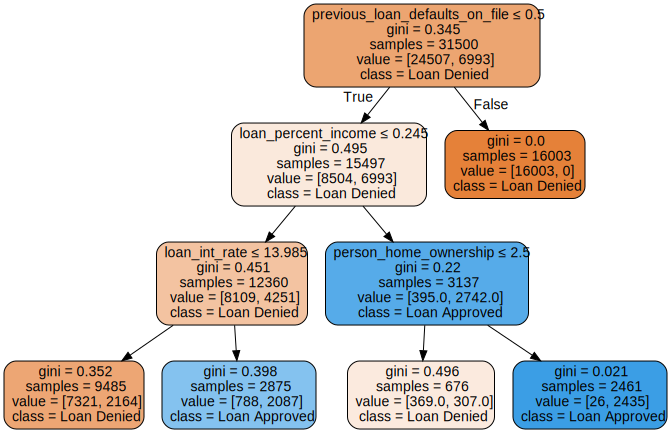

Accuracy: 0.8944444444444445


In [12]:
# Start with a maximum depth of 3 and Gini impurity criterion
dtcGini3 = DecisionTreeClassifier(random_state=42, max_depth=3, criterion='gini')
dtcGini3.fit(X_train, y_train)
visualive_decision_tree(dtcGini3)
y_pred = dtcGini3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

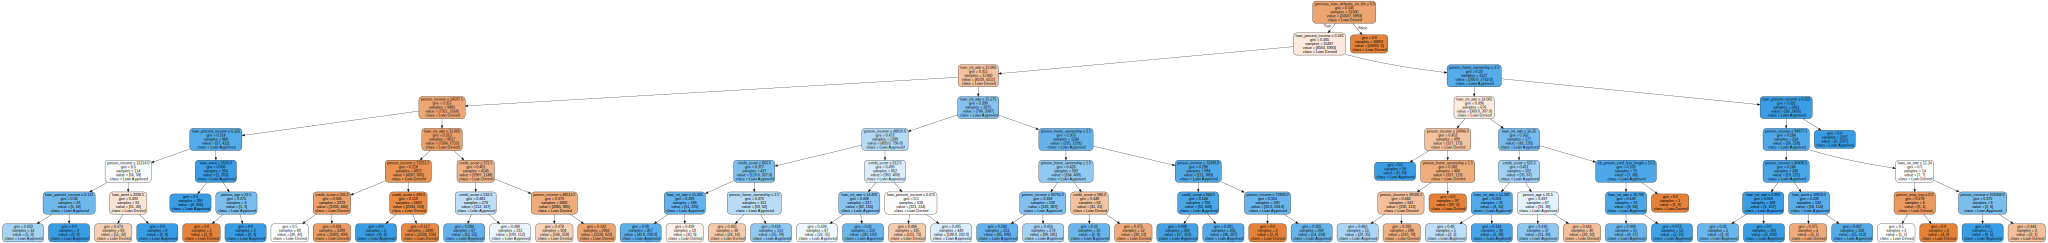

Accuracy: 0.9106666666666666


In [13]:
# Testing with a maximum depth of 7 and Gini impurity criterion
dtcGini7 = DecisionTreeClassifier(random_state=42, max_depth=7, criterion='gini')
dtcGini7.fit(X_train, y_train)
visualive_decision_tree(dtcGini7)
y_pred = dtcGini7.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

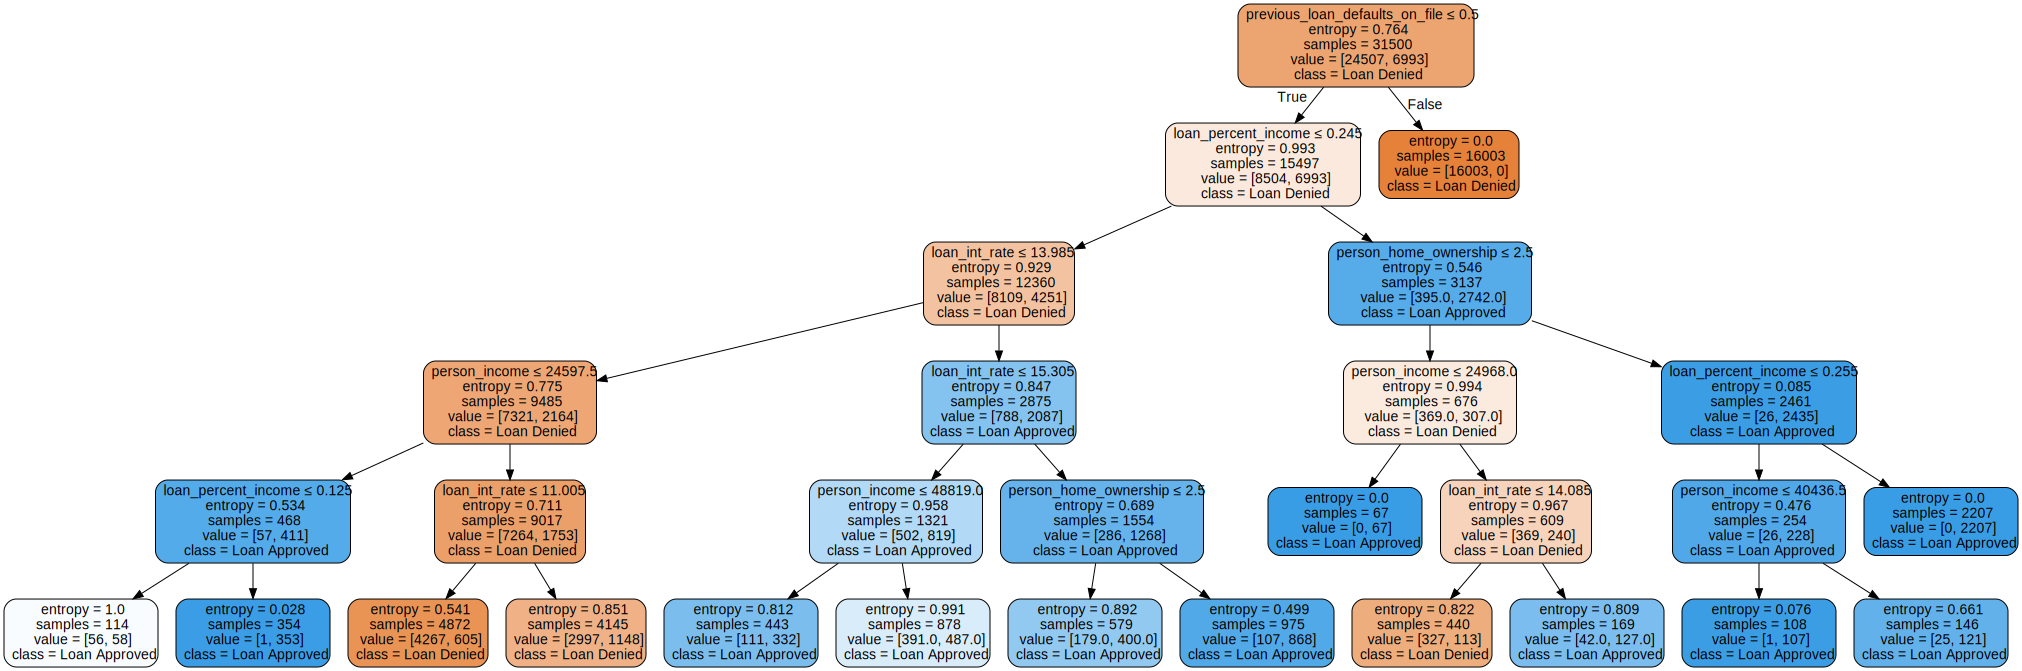

Accuracy: 0.9103703703703704


In [14]:
# Start with a maximum depth of 5 and entropy criterion
dtcEntropy5 = DecisionTreeClassifier(random_state=42, max_depth=5, criterion='entropy')
dtcEntropy5.fit(X_train, y_train)
visualive_decision_tree(dtcEntropy5)
y_pred = dtcEntropy5.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

**Tree Analysis:**



*   Increasing the maximum depth enables the decision tree to capture more complex patterns in the data. However, this comes at the expense of reduced interpretability and a higher risk of overfitting.
*   Changing the splitting criterion (e.g., from Gini impurity to information gain/entropy) influences how the tree selects features for splitting. Notably, Gini impurity often results in simpler trees compared to entropy.
*  Setting the maximum depth too high can significantly increase the risk of overfitting, as the model may begin to memorize noise in the training data rather than generalizing to unseen data.



### What is Sensitivity Analysis?

Sensitivity analysis is a method used for understanding changes to the output of a model under a specific set of assumptions after making changes to the input variables. Sometimes refereed to a "what-if" simulation analysis.

In machine learning, sensitivity analysis is particularly used to gain insight on:


*   Decision boundary behavior
*   Feature importance
*   Model robustness and interpretability



In [15]:
df.columns

Index(['person_age', 'person_education', 'person_income', 'person_emp_exp',
       'person_home_ownership', 'loan_amnt', 'loan_int_rate',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

In [16]:
# Choose two features for sensitivity analysis
features = ['loan_amnt', 'person_income']

# Create a range of values (unique values for categorical features)
feature_ranges = {
    'loan_amnt': np.linspace(df['loan_amnt'].min(), df['loan_amnt'].max(), 10),  # 10 points between min and max
    'person_income': np.linspace(df['person_income'].min(), df['person_income'].max(), 10)  # 10 points between min and max
}


# Store results
results = {}

# Iterate over features
for feature in features:
    # Store accuracy for different feature values
    accuracy_scores = []

    # Iterate over feature range
    for value in feature_ranges[feature]:
        # Create a copy of the original dataset
        df_temp = df.copy()

        # Set the feature to the specific value
        df_temp[feature] = value

        # Split the data
        X_temp = df_temp.drop('loan_status', axis=1)
        y_temp = df_temp['loan_status']
        X_train_temp, X_test_temp, y_train_temp, y_test_temp = train_test_split(X_temp, y_temp, test_size=0.3, random_state=42)

        # Train and evaluate the model
        dtc =  DecisionTreeClassifier(random_state=42, max_depth=5, criterion='entropy') # using highest scoring params
        dtc.fit(X_train_temp, y_train_temp)
        y_pred_temp = dtc.predict(X_test_temp)
        accuracy = accuracy_score(y_test_temp, y_pred_temp)
        accuracy_scores.append(accuracy)

    # Store results for the feature
    results[feature] = accuracy_scores

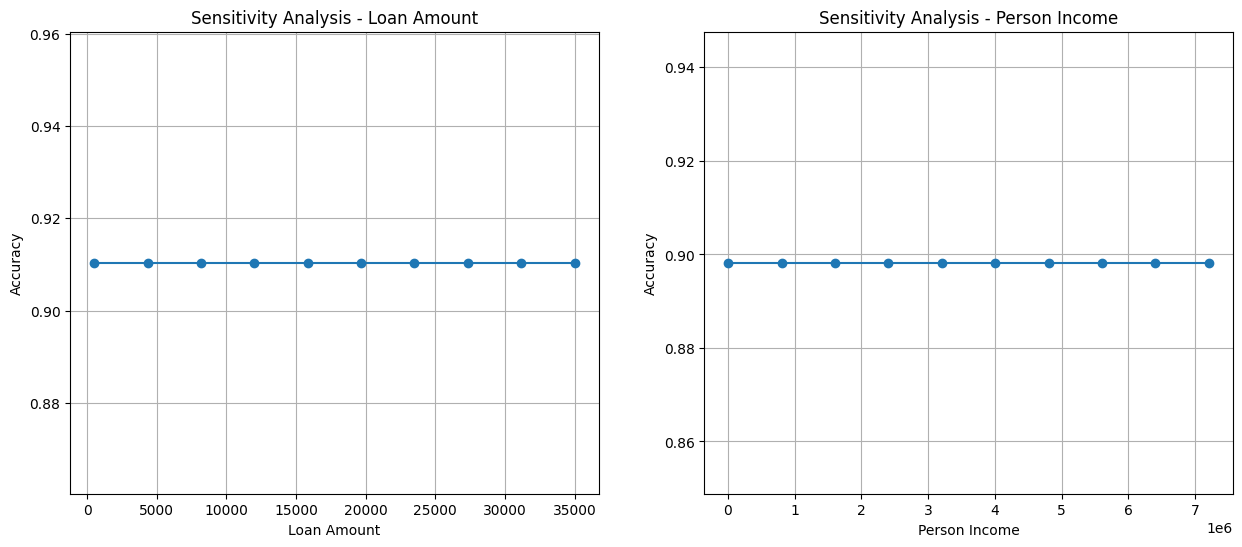

In [17]:
# Plot the results
fig, axs = plt.subplots(1, 2, figsize=(15, 6))  # Create two subplots

# Plot for Traffic_Density
axs[0].plot(feature_ranges['loan_amnt'], results['loan_amnt'], marker='o')
axs[0].set_xlabel("Loan Amount")
axs[0].set_ylabel("Accuracy")
axs[0].set_title("Sensitivity Analysis - Loan Amount")
axs[0].grid(True)

# Plot for Speed_Limit
axs[1].plot(feature_ranges['person_income'], results['person_income'], marker='o')
axs[1].set_xlabel("Person Income")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Sensitivity Analysis - Person Income")
axs[1].grid(True)

plt.show()

Sources:

*   https://www.investopedia.com/terms/s/sensitivityanalysis.asp
*   https://fiveable.me/risk-assessment-and-management/unit-3/decision-trees/study-guide/Juo6HGAfS8osHY8K




## Task 2:
From the Bagging and Boosting ensemble methods pick any one algorithm
from each category. Implement both the algorithms using the same data.
* Use stratified k-fold cross-validation with at least three different folds (e.g., 5, 10, 15).
You may do your own research on this technique (include citations).
* Evaluate the models using any three-evaluation metrics of your choice (e.g. accuracy,
Precision, F1-score etc.).
* Comment on the behavior of each algorithm under the metrics. Does the performance
ranking change based on the metric used? Why?

Will be implementing Random Forest and Gradient Boosting methods using the sklearn.ensemble methods

In [18]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# Define K-fold splits
folds = [5,10,15]
eval_metrics = ['accuracy', 'precision_weighted', 'f1_weighted']

In [19]:
def evaluate_model(model, model_name):
  print(f"\nModel: {model_name}")
  results[model_name] = {}
  for k in folds:
      skfold = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)
      print(f"  Stratified K-Fold: {k} folds")
      results[model_name][k] = {}
      for metric in eval_metrics:
          scores = cross_val_score(model, X_train, y_train, cv=skfold, scoring=metric, n_jobs=-1)
          mean_score = np.mean(scores)
          std_score = np.std(scores)
          results[model_name][k][metric] = (mean_score, std_score)
          print(f"    {metric.capitalize()}: {mean_score:.4f} ± {std_score:.4f}")

In [20]:

# Implement Random Forest with K-fold CV
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
evaluate_model(rf, 'Random Forest')


Model: Random Forest
  Stratified K-Fold: 5 folds
    Accuracy: 0.9205 ± 0.0029
    Precision_weighted: 0.9187 ± 0.0031
    F1_weighted: 0.9186 ± 0.0030
  Stratified K-Fold: 10 folds
    Accuracy: 0.9215 ± 0.0049
    Precision_weighted: 0.9198 ± 0.0052
    F1_weighted: 0.9195 ± 0.0052
  Stratified K-Fold: 15 folds
    Accuracy: 0.9215 ± 0.0050
    Precision_weighted: 0.9197 ± 0.0052
    F1_weighted: 0.9195 ± 0.0053


**Random Forest:**
* Highest accuracy (0.9215) and F1-score (0.9195) at 15 folds.
* Standard deviations increase with more folds, especially from the initial 5-folds, suggesting some sensitivity to data splits.
* The forest seem to make very minor improvements from 10 folds to 15.

In [21]:
# Implement XGBoost with K-fold CV
xgb = GradientBoostingClassifier(random_state=42)
xgb.fit(X_train, y_train)
evaluate_model(xgb, 'Gradient Boosting')


Model: Gradient Boosting
  Stratified K-Fold: 5 folds
    Accuracy: 0.9198 ± 0.0026
    Precision_weighted: 0.9180 ± 0.0027
    F1_weighted: 0.9177 ± 0.0027
  Stratified K-Fold: 10 folds
    Accuracy: 0.9196 ± 0.0050
    Precision_weighted: 0.9177 ± 0.0052
    F1_weighted: 0.9174 ± 0.0052
  Stratified K-Fold: 15 folds
    Accuracy: 0.9193 ± 0.0043
    Precision_weighted: 0.9175 ± 0.0045
    F1_weighted: 0.9171 ± 0.0044


**Gradient Boosting:**
* Shows best accuracy (0.9196) at 10 folds, but performance doesn't consistently improve with more folds
* Precision is consistently the weakest metric.
* Generally smaller standard deviations than Random Forest, especially at lower fold counts.


**Analysis**



1.   Accuracy
  *   Random Forest consistently outperforms Gradient Boosting across all fold counts.
  * The greatest difference is at 15 folds (0.9193 vs 0.9215).

2.   Precision
  *  Random Forest consistently outperforms Gradient Boosting across all fold counts.
  *. The difference is most pronounced at 10 folds (0.9175 vs 0.9198).

3.   F1 Scores
  * Random Forest generally performs better than Gradient Boosting across all folds.
  * The difference is most noticeable at 15 folds (0.9171 vs 0.9195)

**Why?**

* Algorithm Differences:
    * Random Forest's ensemble approach (parallel trees) may handle class imbalances better for precision
    * Gradient Boosting's sequential correction may focus more on overall accuracy

* Metric Sensitivities:
    * Precision is more sensitive to false positives - Random Forest's voting mechanism may be more robust here
    * F1-score balances precision and recall - both algorithms perform similarly as they both handle recall reasonably well
    * Accuracy favors Gradient Boosting when the overall correct prediction rate is slightly better

Sources:
* https://medium.com/@juanc.olamendy/a-comprehensive-guide-to-stratified-k-fold-cross-validation-for-unbalanced-data-014691060f17

## Task 3:
Compare the effectiveness of the three models implemented above. Analyze the results using the following:
* A confusion matrix for one selected test fold.
* A statistical test (e.g., paired t-test) to determine if differences between models are
significant.
* A discussion on the trade-off between bias and variance for each model.

In [22]:
## confusion matrix for selected test fold
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()
    print(classification_report(y_true, y_pred))

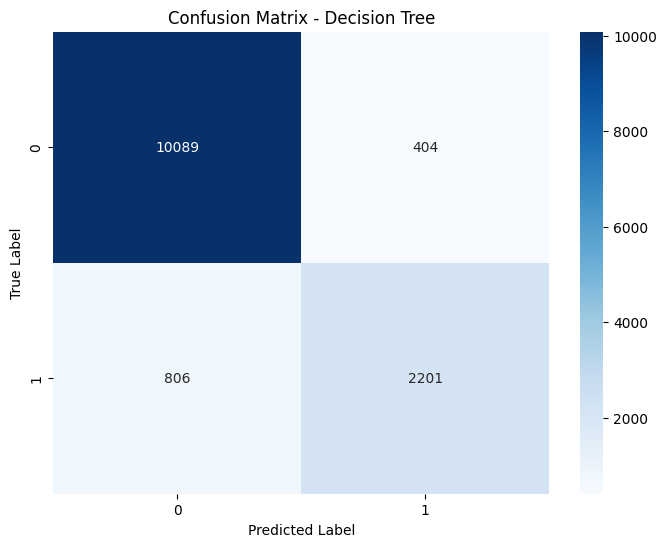

              precision    recall  f1-score   support

           0       0.93      0.96      0.94     10493
           1       0.84      0.73      0.78      3007

    accuracy                           0.91     13500
   macro avg       0.89      0.85      0.86     13500
weighted avg       0.91      0.91      0.91     13500



In [23]:
# Plot confusion matrix for model1
plot_confusion_matrix(y_test, y_pred, 'Decision Tree')

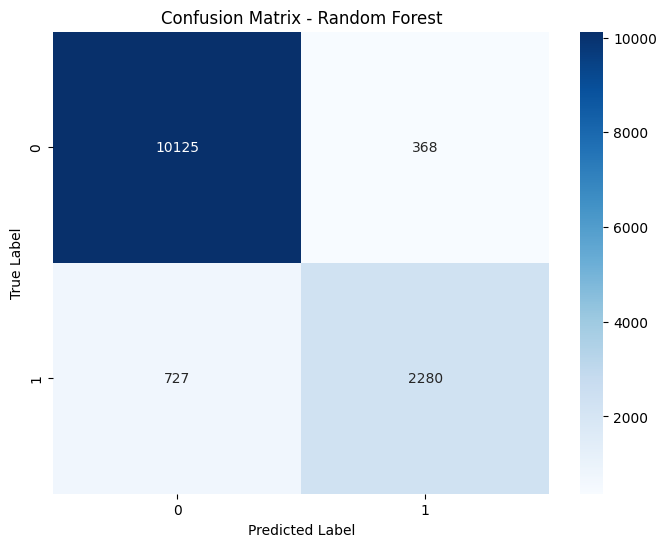

              precision    recall  f1-score   support

           0       0.93      0.96      0.95     10493
           1       0.86      0.76      0.81      3007

    accuracy                           0.92     13500
   macro avg       0.90      0.86      0.88     13500
weighted avg       0.92      0.92      0.92     13500



In [24]:
# Plot confusion matrix for model2
y_predRf = rf.predict(X_test)
plot_confusion_matrix(y_test, y_predRf, 'Random Forest')

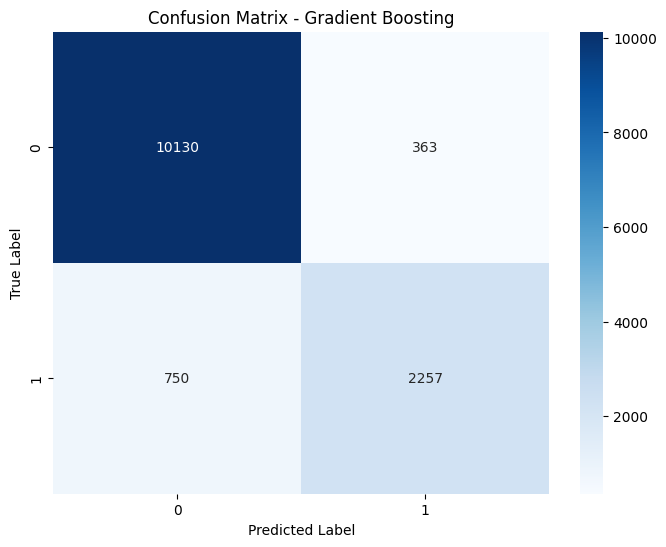

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10493
           1       0.86      0.75      0.80      3007

    accuracy                           0.92     13500
   macro avg       0.90      0.86      0.88     13500
weighted avg       0.92      0.92      0.92     13500



In [25]:
# Plot confusion matrix for model3
y_predXgb = xgb.predict(X_test)
plot_confusion_matrix(y_test, y_predXgb, 'Gradient Boosting')

In [46]:
## statistical test to determine if diff between models is significant

# (Paired t-test)
def paired_t_test(y_true, model1_preds, model2_preds, model_name1, model_name2):

    # Calculate errors (0 for correct, 1 for incorrect)
    errors1 = (y_true != model1_preds).astype(int)
    errors2 = (y_true != model2_preds).astype(int)
    diffs = errors1 - errors2
    # print(np.array_equal(model1_preds, model2_preds))
    # print("Differences:", diffs)
    # print("Variance in differences:", np.var(diffs))
    # Perform paired t-test
    t_stat, p_value = stats.ttest_rel(errors1, errors2)

    print(f"Paired t-test between {model_name1} and {model_name2}:")
    print(f"T-statistic: {t_stat}, P-value: {p_value}")

    if p_value < 0.05:
        print("The difference between the models is statistically significant.")
    else:
        print("The difference between the models is not statistically significant.")
    print()

In [47]:
paired_t_test(y_test, y_pred, y_predRf, 'Decision Tree', 'Random Forest')
paired_t_test(y_test, y_pred, y_predXgb, 'Decision Tree', 'Gradient Boosting')
paired_t_test(y_test, y_predRf, y_predXgb, 'Random Forest', 'Gradient Boosting')

Paired t-test between Decision Tree and Random Forest:
T-statistic: 5.09199529421786, P-value: 3.590875063754448e-07
The difference between the models is statistically significant.

Paired t-test between Decision Tree and Gradient Boosting:
T-statistic: 5.242642846078862, P-value: 1.6068094147244915e-07
The difference between the models is statistically significant.

Paired t-test between Random Forest and Gradient Boosting:
T-statistic: -0.9594003968787032, P-value: 0.3373742583049536
The difference between the models is not statistically significant.



Sources:

* https://www.w3schools.com/python/python_ml_confusion_matrix.asp